In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
result_df = pd.read_csv('results.csv')
stats_df = pd.read_csv('status.csv')
drivers_df = pd.read_csv('drivers.csv')
races_df = pd.read_csv('races.csv')
constructor_df = pd.read_csv('constructors.csv')
driver_standings_df = pd.read_csv('driver_standings.csv')
pd.get_option("display.max_columns",None)

20

In [3]:
# Access the columns of each DataFrame
result_columns = result_df.columns
stats_columns = stats_df.columns
drivers_columns = drivers_df.columns
races_columns = races_df.columns
constructor_columns = constructor_df.columns
driver_standings_columns = driver_standings_df.columns

# Print the columns of each DataFrame
print("result_df columns:", result_columns)
print("-------------------------------------")
print("stats_df columns:", stats_columns)
print("-------------------------------------")
print("drivers_df columns:", drivers_columns)
print("-------------------------------------")

print("races_df columns:", races_columns)
print("-------------------------------------")

print("constructor_df columns:", constructor_columns)
print("-------------------------------------")

print("driver_standings_df columns:", driver_standings_columns)

result_df columns: Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')
-------------------------------------
stats_df columns: Index(['statusId', 'status'], dtype='object')
-------------------------------------
drivers_df columns: Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')
-------------------------------------
races_df columns: Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')
-------------------------------------
constructor_df columns: Index(['constructorId', 'constructorRef', 'name'

In [4]:
# merging to single dataframe
con1 = pd.merge(result_df, races_df, on ='raceId')
con2 = pd.merge(con1, drivers_df, on = 'driverId')
con3 = pd.merge(con2, driver_standings_df, on = 'driverId')
con4 = pd.merge(con3, constructor_df, on ='constructorId')
df = pd.merge(con4, stats_df, on ='statusId')
# pd.get_option("display.max_columns",None)
df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,...,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name_y,nationality_y,url,status
0,1,18,1,1,22,1,1,1,1,10.0,...,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,...,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,...,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,...,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,...,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [5]:
print(df.columns)

Index(['resultId', 'raceId_x', 'driverId', 'constructorId', 'number_x', 'grid',
       'position_x', 'positionText_x', 'positionOrder', 'points_x', 'laps',
       'time_x', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name_x',
       'date', 'time_y', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time',
       'sprint_date', 'sprint_time', 'driverRef', 'number_y', 'code',
       'forename', 'surname', 'dob', 'nationality_x', 'url_y',
       'driverStandingsId', 'raceId_y', 'points_y', 'position_y',
       'positionText_y', 'wins', 'constructorRef', 'name_y', 'nationality_y',
       'url', 'status'],
      dtype='object')


In [6]:
# Select relevant columns
selected_columns = ['grid', 'position_x', 'laps', 'fastestLap', 'rank', 'circuitId', 'points_x']
df_selected = df[selected_columns]

In [7]:
# Check for missing values
missing_values = df_selected.isnull().sum()
print(missing_values)

grid          0
position_x    0
laps          0
fastestLap    0
rank          0
circuitId     0
points_x      0
dtype: int64


In [8]:
# Check for duplicate rows
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
print("Number of duplicate rows:", duplicate_rows.shape[0])

# Continue with your analysis, handling duplicate rows if necessary


Number of duplicate rows: 0


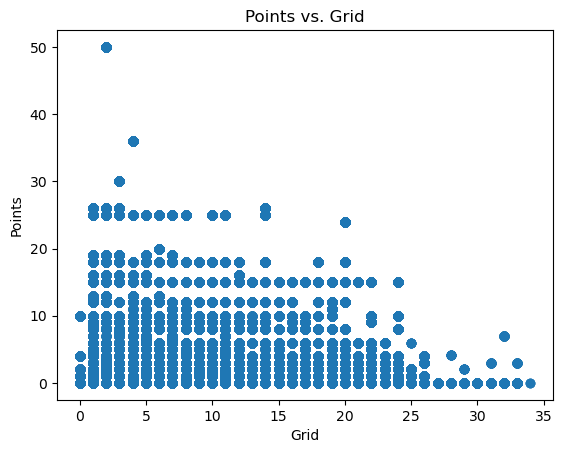

In [9]:
# Scatter plot - Points vs. Grid
plt.scatter(df_selected['grid'], df_selected['points_x'])
plt.xlabel('Grid')
plt.ylabel('Points')
plt.title('Points vs. Grid')
plt.show()

#The scatter plot shows the relationship between the starting grid position ('grid') and 
#the points achieved ('points_x') by drivers. It helps identify if there is any correlation or pattern 
#between the grid position and the points scored.


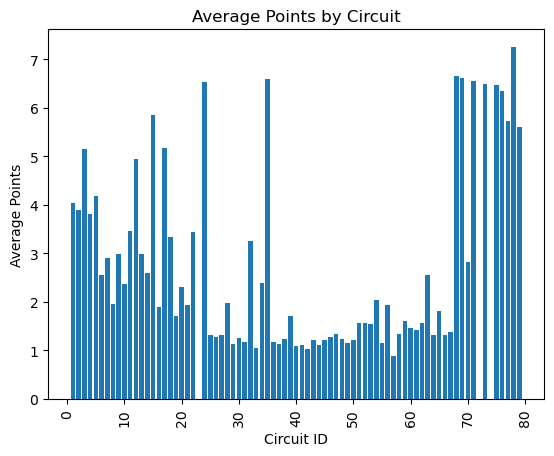

In [10]:
# Calculate average points by circuit
average_points_by_circuit = df_selected.groupby('circuitId')['points_x'].mean()

# Bar plot - Average Points by Circuit
plt.bar(average_points_by_circuit.index, average_points_by_circuit.values)
plt.xlabel('Circuit ID')
plt.ylabel('Average Points')
plt.title('Average Points by Circuit')
plt.xticks(rotation=90)
plt.show()

#The bar plot displays the average points achieved by drivers at different circuits ('circuitId'). 
#It helps compare the performance of 
#drivers at different tracks and identify circuits where drivers, on average, score higher or lower points.

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Handling Missing Values
df[['grid', 'position_x', 'laps', 'fastestLap', 'rank', 'points_x']] = df[['grid', 'position_x', 'laps', 'fastestLap', 'rank', 'points_x']].replace('\\N', np.nan)
df[['grid', 'position_x', 'laps', 'fastestLap', 'rank', 'points_x']] = df[['grid', 'position_x', 'laps', 'fastestLap', 'rank', 'points_x']].astype(float)
df[['grid', 'position_x', 'laps', 'fastestLap', 'rank', 'points_x']] = df[['grid', 'position_x', 'laps', 'fastestLap', 'rank', 'points_x']].fillna(df[['grid', 'position_x', 'laps', 'fastestLap', 'rank', 'points_x']].mean())

# Handling Categorical Variables
df_encoded = pd.get_dummies(df, columns=['circuitId'])

# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[['grid', 'position_x', 'laps', 'fastestLap', 'rank', 'points_x']])
df_scaled = pd.DataFrame(df_scaled, columns=['grid', 'position_x', 'laps', 'fastestLap', 'rank', 'points_x'])

# Data Splitting
X = df_scaled.drop('points_x', axis=1)  # Features
y = df_scaled['points_x']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
print("Before HyperPArameter Tuning")
# List of regression algorithms
algorithms = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor()
]

# Train and evaluate each algorithm
for algorithm in algorithms:
    model = algorithm
    model.fit(X_train, y_train)
    
    # Training set predictions
    y_train_pred = model.predict(X_train)
    
    # Testing set predictions
    y_test_pred = model.predict(X_test)
    
    # Calculate residuals for testing set
    residuals = y_test - y_test_pred
    
    # Calculate degrees of freedom for testing set
    n = len(y_test)
    p = X_test.shape[1]
    dof = n - p - 1
    
    # Calculate mean squared error for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Calculate R-squared for training and testing sets
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Calculate adjusted R-squared for training set
    train_adj_r2 = 1 - ((1 - train_r2) * (n - 1) / (n - p - 1))
    
    # Calculate adjusted R-squared for testing set
    test_adj_r2 = 1 - ((1 - test_r2) * (n - 1) / dof)
    
    # Print the metrics
    print("Algorithm:", type(model).__name__)
    print("Training Set - Mean Squared Error:", train_mse)
    print("Training Set - R-squared:", train_r2)
    print("Training Set - Adjusted R-squared:", train_adj_r2)
    print("Testing Set - Mean Squared Error:", test_mse)
    print("Testing Set - R-squared:", test_r2)
    print("Testing Set - Adjusted R-squared:", test_adj_r2)
    print()


In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense

# Reshape the input data for CNNLSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create CNNLSTM model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=64, activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with  epochs
model.fit(X_train, y_train, epochs=0, batch_size=32)

# Training set predictions
y_train_pred = model.predict(X_train)

# Testing set predictions
y_test_pred = model.predict(X_test)

# Calculate residuals for testing set
# residuals = y_test - y_test_pred

# Convert y_test and y_test_pred to NumPy arrays
y_test = np.array(y_test)
y_test_pred = np.array(y_test_pred)

# Reshape y_test and y_test_pred if necessary
if len(y_test.shape) > 1:
    y_test = y_test.reshape(-1)
if len(y_test_pred.shape) > 1:
    y_test_pred = y_test_pred.reshape(-1)

# Calculate degrees of freedom for testing set
n = len(y_test)
p = X_test.shape[1]
dof = n - p - 1

# Calculate mean squared error for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate adjusted R-squared for training set
train_adj_r2 = 1 - ((1 - train_r2) * (n - 1) / (n - p - 1))

# Calculate adjusted R-squared for testing set
test_adj_r2 = 1 - ((1 - test_r2) * (n - 1) / dof)

# Print the metrics
print("CNNLSTM Model")
print("Training Set - Mean Squared Error:", train_mse)
print("Training Set - R-squared:", train_r2)
print("Training Set - Adjusted R-squared:", train_adj_r2)
print("Testing Set - Mean Squared Error:", test_mse)
print("Testing Set - R-squared:", test_r2)
print("Testing Set - Adjusted R-squared:", test_adj_r2)
print()


21724/21724 [==============================] - 25s 1ms/step
CNNLSTM Model
Training Set - Mean Squared Error: 1.007343855960428
Training Set - R-squared: -0.007689920388074478
Training Set - Adjusted R-squared: -0.007697168360250473
Testing Set - Mean Squared Error: 1.009076688849869
Testing Set - R-squared: -0.0076927774942086025
Testing Set - Adjusted R-squared: -0.007700025486934603

